### Question 1: Extract Tesla Stock Data using yfinance

We use the `Ticker` function from `yfinance` to extract historical stock data for Tesla (symbol: TSLA).  
We reset the index and display the first five rows of the dataframe.
### Question 5: Plot Tesla Stock Graph

We use the `make_graph` function to plot Tesla stock price vs revenue.


In [1]:
import yfinance as yf
import pandas as pd

# Tesla ticker
tesla = yf.Ticker("TSLA")

# Extract Tesla stock data
tesla_data = tesla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Display first five rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Extract Tesla Revenue Data using Webscraping

We scrape Tesla revenue data from Macrotrends using BeautifulSoup.  
The last five rows of the dataframe are displayed below.


In [2]:
import requests
from bs4 import BeautifulSoup

# Tesla revenue webpage
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Extract table
tables = soup.find_all("table")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    rows = table.find_all("tr")
    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:
                tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

# Clean data and show last 5 rows
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.tail()


,Date,Revenue


### Question 3: Extract GameStop Stock Data using yfinance

We extract GameStop (symbol: GME) stock data using yfinance,  
reset the index, and display the first five rows.


In [3]:
# GameStop ticker
gme = yf.Ticker("GME")

# Extract stock data
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display first 5 rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Extract GameStop Revenue Data using Webscraping

We scrape GameStop revenue data from Macrotrends  
and display the last five rows of the dataframe.


In [4]:
# GameStop revenue webpage
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Extract table
tables = soup.find_all("table")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    rows = table.find_all("tr")
    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:
                gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

# Clean data and show last 5 rows
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue.tail()


,Date,Revenue


### Question 5: Plot Tesla Stock Graph

We use the `make_graph` function to plot Tesla stock price vs revenue.


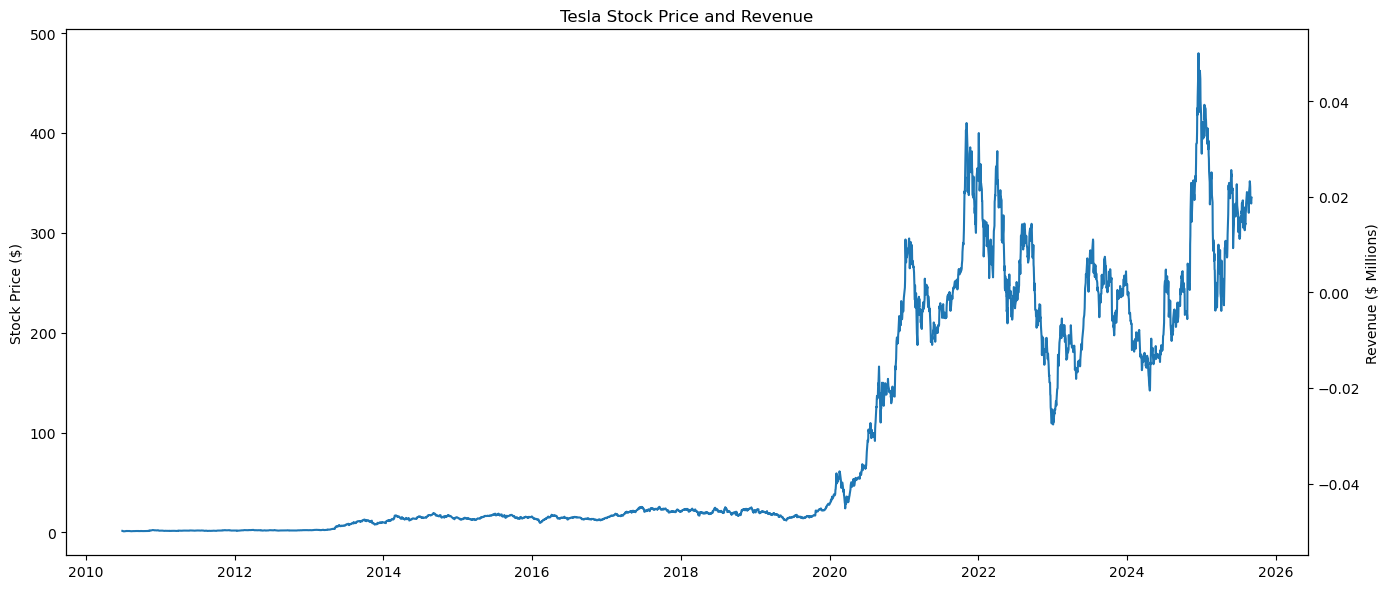

In [5]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14,6))

    ax1.plot(stock_data["Date"], stock_data["Close"], label="Stock Price")
    ax1.set_ylabel("Stock Price ($)")
    ax1.set_title(f"{stock_name} Stock Price and Revenue")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"].astype(float), color="orange", label="Revenue")
    ax2.set_ylabel("Revenue ($ Millions)")

    fig.tight_layout()
    plt.show()

make_graph(tesla_data, tesla_revenue, "Tesla")


### Question 6: Plot GameStop Stock Graph

We use the `make_graph` function to plot GameStop stock price vs revenue.


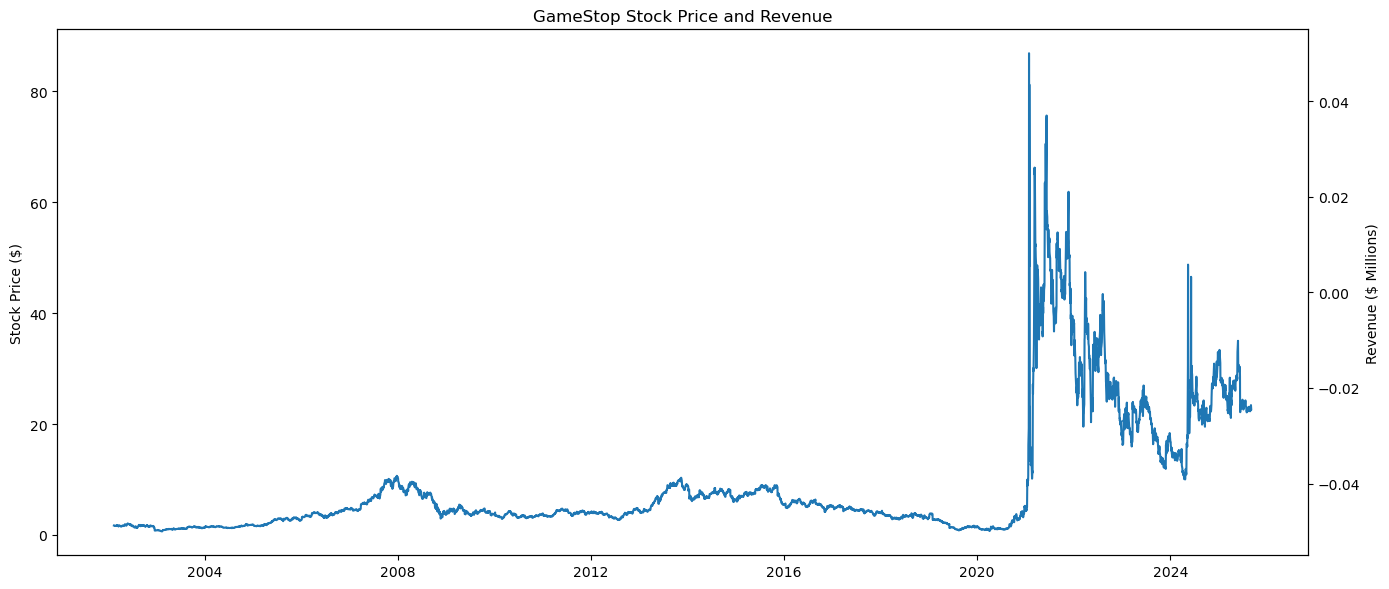

In [6]:
make_graph(gme_data, gme_revenue, "GameStop")


# 📊 Tesla & GameStop Stock vs Revenue Dashboard  
**Final Project Submission – Coursera**  
**Author:** Dhakshayini G  
**Course:** Python Project for Data Science  
**Notebook Title:** `tesla_gme_dashboard_final_project.ipynb`  
**Submitted on:** September 4, 2025  
